In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv("../project_two-master/data/microprocessor-clock-speed.csv")

In [10]:
df = pd.get_dummies(df)

In [11]:
df

,Year,Microprocessor clock speed (Hertz (pulses per second)),Entity_World,Code_OWID_WRL
0,1976,1350000,1,1
1,1977,2060000,1,1
2,1978,2140000,1,1
3,1979,2290000,1,1
4,1980,1940000,1,1
5,1981,2410000,1,1
6,1982,2630000,1,1
7,1983,4070000,1,1
8,1984,5190000,1,1
9,1985,5890000,1,1


In [12]:
df = df.rename(columns={'Microprocessor clock speed (Hertz (pulses per second))':'Pulses'})

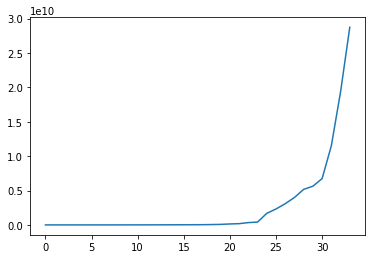

In [13]:
plt.plot(df['Pulses'])

In [14]:
X = df.Year.values.reshape(-1,1)

In [15]:
y = df.Pulses.values.reshape(-1,1)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[3.96721482e+08]]
y-axis intercept:  [-7.88088443e+11]


In [19]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1350000]
Predicted output: [-4.16679541e+09]
Prediction Error: [-4.16814541e+09]


In [21]:
x_min = X.min()
x_max = X.max()

In [22]:
y_min_actual = y.min()
y_max_actual = y.max()

In [23]:
y_min = -7.88088443e+11 + 3.96721482e+08 * x_min
y_max = -7.88088443e+11 + 3.96721482e+08 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 1350000
Calculated Min Value: -4166794568.0
Actual Max Value: 28751000000
Calculated Max Value: 11702064712.0


In [24]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 1350000
Predicted Min Value: [[-4.16679541e+09]]
Actual Max Value: 28751000000
Predicted Max Value: [[1.17020639e+10]]


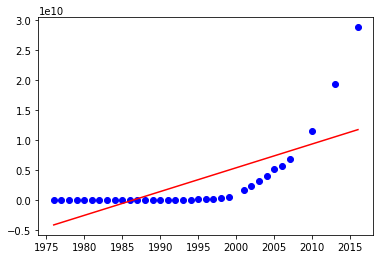

In [25]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 1.7958513345855465e+19
R-squared (R2 ): 0.5056542000940738


In [27]:
model.score(X, y)

0.5056542000940738

In [28]:
z = [[2017]]

In [29]:
model.predict(z)

array([[1.20987853e+10]])